### 13.2.3 계층적 군집화 모델 구현하기

In [1]:
import numpy as np

X = np.array([[1, 0], [1, 3], [0, 1], [4, 9], [3, -2], [-1, 1]])

In [2]:
clusters = [[X[i]] for i in range(len(X))]
print(f'초기 군집: {clusters}')

초기 군집: [[array([1, 0])], [array([1, 3])], [array([0, 1])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1])]]


In [3]:
def dist(A, B):
    val = np.inf
    for a in A:
        for b in B:
            tmp = np.linalg.norm(a - b)
            if tmp < val: val = tmp
    return val

In [4]:
while len(clusters) > 1:
    val = np.inf
    ind1 = -1
    ind2 = -1
    # a > b
    for a in range(len(clusters)):
        for b in range(a):
            tmp = dist(clusters[a], clusters[b])
            if tmp < val:
                val = tmp
                ind1 = a
                ind2 = b
    c1 = clusters.pop(ind1)
    c2 = clusters.pop(ind2)
    
    clusters.append(c1 + c2)
    print(f'단계 {6 - len(clusters)}: {clusters}')

단계 1: [[array([1, 0])], [array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1])]]
단계 2: [[array([1, 3])], [array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1]), array([1, 0])]]
단계 3: [[array([4, 9])], [array([ 3, -2])], [array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3])]]
단계 4: [[array([4, 9])], [array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3]), array([ 3, -2])]]
단계 5: [[array([-1,  1]), array([0, 1]), array([1, 0]), array([1, 3]), array([ 3, -2]), array([4, 9])]]


### [예제 13.1] AgglomerativeClustering 클래스 사용하기

In [5]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])

In [6]:
clustering1 = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(X)
print(f'군집의 수를 설정한 모델링 결과: {clustering1.labels_}')

군집의 수를 설정한 모델링 결과: [0 0 1 0 0 1]


In [7]:
clustering2 = AgglomerativeClustering(n_clusters=None,
                                      linkage='complete',
                                      distance_threshold=2.5).fit(X)
print(f'군집화 기준 거리를 설정한 모델링 결과: {clustering2.labels_}')

군집화 기준 거리를 설정한 모델링 결과: [2 2 3 0 0 1]


In [8]:
clustering3 = AgglomerativeClustering(n_clusters=4, linkage='complete').fit(X)
print(f'군집의 수를 4로 설정한 모델링 결과: {clustering3.labels_}')

군집의 수를 4로 설정한 모델링 결과: [2 2 3 0 0 1]


### [예제 13.2] 덴드로그램으로 계층적 군집화 결과 시각화하기

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X = load_iris().data

In [10]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

In [11]:
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_,
                                  counts]).astype(float)

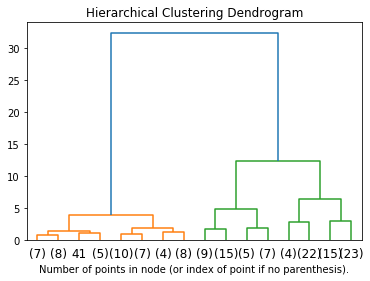

In [12]:
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 13 되새김 문제

### [되새김 문제 13.1] AgglomerativeClustering 클래스 적용하기

#### 문제

In [13]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

X, _ = load_diabetes(return_X_y=True, as_frame=True)

#### 풀이

In [14]:
for n_clust in range(5, 12):
    cluster_labels = AgglomerativeClustering(n_clusters=n_clust).fit_predict(X)
    print(n_clust, ":", silhouette_score(X, cluster_labels))

5 : 0.10103318852875223
6 : 0.105040304263116
7 : 0.10959850255254193
8 : 0.10588224751966079
9 : 0.1061350114934274
10 : 0.10998075776769138
11 : 0.10553043308856352


In [15]:
X['label'] = AgglomerativeClustering(n_clusters=7).fit_predict(X)

X.groupby(by='label').mean()['bmi'].sort_values(ascending=False)

label
5    0.029383
1    0.028349
2    0.013293
0    0.011963
3   -0.019886
6   -0.037463
4   -0.050944
Name: bmi, dtype: float64